# <center> Майнор "Интеллектуальный анализ данных" </center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [708]:
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from scipy import stats
# from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [709]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [710]:
data = pd.read_csv("/content/drive/MyDrive/IAD/Lab_1/students_data.csv")
data.shape

(1044, 36)

In [711]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [712]:
pd.read_csv('/content/drive/MyDrive/IAD/Lab_1/students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  

## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 11](#task11)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [713]:
# Исходные типы признаков
data.dtypes

ID              int64
Subject        object
school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu           object
Fedu           object
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float64
freetime        int64
goout           int64
Dalc          float64
Walc          float64
health          int64
absences        int64
cheating       object
G1              int64
G2              int64
G3              int64
dtype: object

In [714]:
for i in data.columns:
  print(f"Column '{i}' values: {data.loc[:, i].unique()}")

Column 'ID' values: [100097 101021 102965 ... 998425 999143 999194]
Column 'Subject' values: ['Por' 'Math']
Column 'school' values: ['GP' 'MS']
Column 'sex' values: ['F' 'M' 'm']
Column 'age' values: [16 17 18 15 19 21 20 22]
Column 'address' values: ['U' 'R']
Column 'famsize' values: ['GT3' 'LE3']
Column 'Pstatus' values: ['A' 'T' 't']
Column 'Medu' values: ['3' '1' '2' '4' '0' 'o']
Column 'Fedu' values: ['4' '2' '3' '1' 'o' '0']
Column 'Mjob' values: ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Column 'Fjob' values: ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
Column 'reason' values: ['course' 'home' 'reputation' 'other']
Column 'guardian' values: ['father' 'mother' 'other' 'futher']
Column 'traveltime' values: [1 2 3 4]
Column 'studytime' values: [1 2 4 3]
Column 'failures' values: [0 2 1 3]
Column 'schoolsup' values: ['no' 'yes']
Column 'famsup' values: ['no' 'yes']
Column 'paid' values: ['no' 'yes']
Column 'activities' values: ['no' 'yes']
Column 'nur

In [715]:
data = data.replace(
    {'sex': {'m': 'M'},
     'Pstatus': {'t': 'T'},
     'Medu': {'o': '0'},
     'Fedu': {'o': '0'},
     'Mjob': {'at-home': 'at_home'},
     'Fjob': {'at-home': 'at_home'},
     'guardian': {'futher': 'father'}
    }
)

In [716]:
data[['Medu', 'Fedu']] = data[['Medu', 'Fedu']].applymap(int)

In [717]:
for i in data.columns:
  print(f"Column '{i}' values: {data.loc[:, i].unique()}")

Column 'ID' values: [100097 101021 102965 ... 998425 999143 999194]
Column 'Subject' values: ['Por' 'Math']
Column 'school' values: ['GP' 'MS']
Column 'sex' values: ['F' 'M']
Column 'age' values: [16 17 18 15 19 21 20 22]
Column 'address' values: ['U' 'R']
Column 'famsize' values: ['GT3' 'LE3']
Column 'Pstatus' values: ['A' 'T']
Column 'Medu' values: [3 1 2 4 0]
Column 'Fedu' values: [4 2 3 1 0]
Column 'Mjob' values: ['services' 'other' 'health' 'at_home' 'teacher']
Column 'Fjob' values: ['other' 'services' 'health' 'at_home' 'teacher']
Column 'reason' values: ['course' 'home' 'reputation' 'other']
Column 'guardian' values: ['father' 'mother' 'other']
Column 'traveltime' values: [1 2 3 4]
Column 'studytime' values: [1 2 4 3]
Column 'failures' values: [0 2 1 3]
Column 'schoolsup' values: ['no' 'yes']
Column 'famsup' values: ['no' 'yes']
Column 'paid' values: ['no' 'yes']
Column 'activities' values: ['no' 'yes']
Column 'nursery' values: ['yes' 'no']
Column 'higher' values: ['yes' 'no']
C

In [718]:
cat_vars = ['Subject', 'school', 'sex', 'address', 'famsize',
            'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic',
            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'cheating']

for i in cat_vars:
  data[i] = data[i].astype('category')

data['ID'] = data['ID'].astype('object')

data.dtypes

ID              object
Subject       category
school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu          category
Fedu          category
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime    category
studytime     category
failures         int64
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
romantic      category
famrel        category
freetime      category
goout         category
Dalc          category
Walc          category
health        category
absences         int64
cheating      category
G1               int64
G2               int64
G3               int64
dtype: object

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [719]:
data.isna().sum()

ID              0
Subject         0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic       10
famrel         10
freetime        0
goout           0
Dalc           10
Walc           10
health          0
absences        0
cheating      700
G1              0
G2              0
G3              0
dtype: int64

- Значения признаков **romantic**, **famrel**, **Dalc**, **Walc** пропущены в 10 строках
- Значения признака **cheating** пропущены в целых 700 строках!

In [720]:
data['cheating'] = data['cheating'].fillna('no')

- В исходных данных у многих наблюдений признак **cheating** не указан, поэтому человек не может быть обвинён в списывании, если он не был пойман на этом.
- Презумпция невиновности в действии! 
- Удалять этот признак не рекомендуется, потому что он является потенциально важным, хотя пропущен в большом количестве строк. Его удаление может позже вызвать искажение результатов анализа.

In [721]:
data['romantic'] = data['romantic'].fillna('no')

- Ситуация похожа на ситуацию со списыванием, только пропущенных значений в этот раз гораздо меньше. 
- Но пропущенные значения всё равно можно заменить на **no**. Если информации об этом нет, значит человек либо специально это скрывает, либо он просто не состоит в отношениях, а поле пропущено по какой-то иной причине (могли просто забыть).

In [722]:
imp = SimpleImputer(strategy="most_frequent")
data.iloc[:, :] = imp.fit_transform(data)

- Признаки **famrel**, **Dalc** и **Walc** также являются категориальными, но с более существенной градацией между категориями.
- Вместо того, чтобы удалять строки, мы заполняем эти значения во всего 10 строках вычисленной для каждого признака модой.
- Это можно было бы сделать через KNN, но тогда пришлось бы уже на данном этапе перекодировать весь датасет в числовой вид, а нам ещё нужны эти кагории для последющего анализа (как минимум, для удобства)
- Мы заполняем значениями именной модой, потому что заполнять константой именно такие значения, зная их описание, достаточно странная идея.
- Среднее значение для них было бы крайне странно считать, ибо это, опять же, категориальные переменные.

In [723]:
data.isna().sum()

ID            0
Subject       0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
cheating      0
G1            0
G2            0
G3            0
dtype: int64

In [724]:
# Приведём famrel из float в int
data.loc[:, ['famrel', 'Dalc', 'Walc']] = data.loc[:, ['famrel', 'Dalc', 'Walc']].astype(int)

- Всё! Мы смогли обработать пропущенные значения.
- Пора перекодировать датафрейм в числа для дальнейшей работы

### Задание 3  
  
Проанализируйте данные на наличие выбросов.   
Сколько наблюдений можно отнести к выбросам по каждому признаку? Сколько всего выбросов в данных?  
  
**Note:** Выбросы можно не удалять из данных. Это информацию можно учитывать в дальнейшем анализе и удалять выбросы при необходимости. 

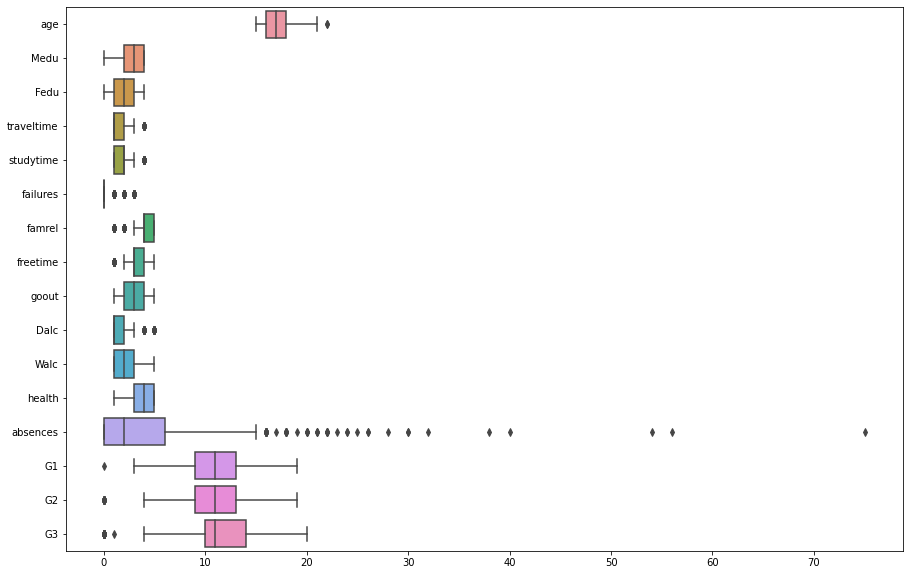

In [725]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop(columns=['ID']), orient='h')

- Категориальные переменные нам рассматривать нет смысла, потому что там вполне ограниченный и логичный круг значений и о выбросах речи не идёт
- Будем рассматривать выбросы числовых значений
- Хотя одно из значений возраста на коробке с усами является выбросом, оно вполне возможно в реальной жизни
- Хотя много значений в absences выходят за рамки ящика с усами, значения, чуть выходящие за рамки (примерно до 27), распределены достаточно плотно, так что вполне могут быть не выбросами, но стоит посмотреть на эти сэмплы глазами и оценить
- Выбросы в G1, G2, G3 выражаются слишком маленькими значениями, но всё же стоит посмотреть своими глазами на эти сэмплы перед их удалением
- Кроме того, G3 это итоговая оценка за два семестра, поэтому было бы вполне логично, если бы её значение было бы в районе среднего G1 и G2 у наблюдения
- В одном из сэмплов G1 и G2 равны 10, а G3 равно 1, вот это пример того, что очень вряд ли является нормальным наблюдением
- Для удобства можем попробовать считать арифметическое среднее и можно сделать поправку +-3 балла от среднего, ибо оно всё-таки не совсем среднее. Это может быть какой-то экзамен или что-то подобное
- Но если у человека всё ок было весь год, то почему он должен был завалить экзамен?
- Но сразу удалять всё, выходящее за рамки боксплота, не лучшее решение, ибо количество пропусков вполне может коррелировать с оценкой, логично ведь?

In [726]:
# Мы рассматриваем числовые признаки absences, G1, G2 и G3
z = np.abs(stats.zscore(data.loc[:, ['absences', 'G1', 'G2', 'G3']]))
print(z)

[[1.21879866 1.26976633 0.53413517 0.68808807]
 [0.39227478 1.94046507 2.05690172 1.46469775]
 [0.71448946 0.74232988 0.98863139 0.34739149]
 ...
 [0.71448946 1.6051157  1.75234841 1.72356764]
 [0.07006009 0.74232988 0.68407808 0.0885216 ]
 [1.54101334 0.26371823 0.07497146 0.0885216 ]]


In [727]:
# Задаём threshold для z-score
outliers = np.where(z > 3)
outliers

(array([  27,   61,   83,  219,  226,  229,  233,  234,  292,  336,  350,
         353,  358,  367,  385,  391,  410,  438,  474,  497,  589,  592,
         594,  684,  710,  745,  756,  786,  788,  899,  937,  961,  978,
         990, 1026]),
 array([0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2,
        0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2]))

In [728]:
data.iloc[outliers[0], :].head()

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
27,125309,Math,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,yes,yes,no,4,2,4,2,3,2,24,no,18,18,18
61,146260,Por,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,no,0,11,11
83,163217,Por,MS,F,19,R,GT3,A,1,1,at_home,at_home,course,other,2,2,3,no,yes,no,yes,yes,no,no,yes,3,5,4,1,4,1,0,yes,8,0,0
219,278808,Por,GP,F,15,U,GT3,A,3,3,services,services,home,mother,1,2,0,no,no,no,no,no,yes,no,yes,1,3,2,2,3,1,24,yes,9,8,9
226,283207,Por,GP,M,18,U,GT3,T,2,2,other,at_home,course,other,1,1,1,no,yes,no,yes,no,no,yes,yes,4,4,3,2,2,1,26,no,7,8,8


In [729]:
counter = Counter(outliers[1])

print(f'С помощью z-score было найдено {len(outliers[0])} выбросов по 4 признакам, указанным выше.\n')
print(f'Количество выбросов по каждому признаку:\n')

for idx, i in counter.items():
  print(f"{data.loc[:, ['absences', 'G1', 'G2', 'G3']].columns[idx]:8} --> {i}")

С помощью z-score было найдено 35 выбросов по 4 признакам, указанным выше.

Количество выбросов по каждому признаку:

absences --> 14
G1       --> 1
G2       --> 20


In [730]:
Q1 = data.loc[:, ['absences', 'G1', 'G2', 'G3']].quantile(0.25)
Q3 = data.loc[:, ['absences', 'G1', 'G2', 'G3']].quantile(0.75)
IQR = Q3 - Q1

print(f'Q1\n{Q1}\n')
print(f'Q3\n{Q3}\n')
print(f'IQR\n{IQR}\n')

Q1
absences     0.0
G1           9.0
G2           9.0
G3          10.0
Name: 0.25, dtype: float64

Q3
absences     6.0
G1          13.0
G2          13.0
G3          14.0
Name: 0.75, dtype: float64

IQR
absences    6.0
G1          4.0
G2          4.0
G3          4.0
dtype: float64



In [731]:
iqr = ((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR)))

In [732]:
print(f'С помощью IQR (тот же box plot) было найдено {iqr.sum(axis=0).sum()} выбросов по 4 признакам, указанным выше.\n')
print(f'Количество выбросов по каждому признаку:\n')

for i in ['absences', 'G1', 'G2', 'G3']:
  print(f"{i:8} --> {iqr.sum(axis=0)[i]}")

С помощью IQR (тот же box plot) было найдено 129 выбросов по 4 признакам, указанным выше.

Количество выбросов по каждому признаку:

absences --> 54
G1       --> 1
G2       --> 20
G3       --> 54


In [733]:
clean_data_idx = data[~iqr.any(axis=1)]['ID']

In [734]:
clean_data = data[data['ID'].isin(clean_data_idx)]

In [735]:
# Переведём данные в числовой вид
enc_data = clean_data.copy()
for col in data.columns:
  if data[col].dtype == pd.Categorical:
    enc_data[col], _ = pd.factorize(clean_data[col])

In [736]:
cat_vars = ['Subject', 'school', 'sex', 'address', 'famsize',
            'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic',
            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'cheating']

for i in cat_vars:
  clean_data.loc[:, i] = clean_data[i].astype('category')

clean_data.loc[:, 'ID'] = clean_data['ID'].astype('object')

clean_data.dtypes

ID              object
Subject       category
school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu          category
Fedu          category
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime    category
studytime     category
failures         int64
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
romantic      category
famrel        category
freetime      category
goout         category
Dalc          category
Walc          category
health        category
absences         int64
cheating      category
G1               int64
G2               int64
G3               int64
dtype: object

### Задание  11 <a id="task11"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

**Сразу перейдём к 11 заданию и заранее выясним студентов, посещающих оба курса.**

In [737]:
students = data.groupby(data.columns[2:-3].tolist()).groups
duplicate_students = [students[x] for x in students if len(students[x]) > 1]

duplicate_marks = {}

for idx, i in enumerate(duplicate_students):
  duplicate_marks[idx, data.iloc[i[0], 1]] = data.iloc[i[0], [0, -3, -2, -1]]
  duplicate_marks[idx, data.iloc[i[1], 1]] = data.iloc[i[1], [0, -3, -2, -1]]

duplicate_idx = pd.MultiIndex.from_tuples(duplicate_marks)

In [738]:
mp = pd.DataFrame(index=duplicate_idx, data=duplicate_marks.values(),
                  columns=['ID', 'G1', 'G2', 'G3'])
mp.index.set_names(['Student', 'Subject'], inplace=True)
mp['ID'] = mp['ID'].astype('object')
mp.head(4)

ID  G1  G2  G3
Student Subject                    
0       Math     257390  10  11  11
        Por      746312  10  10  10
1       Math     544841   9  10  10
        Por      566220  13  12  12

In [739]:
mp.groupby('Subject').mean()

,G1,G2,G3
Subject,,,
Math,11.724138,12.034483,12.344828
Por,12.379310,12.517241,12.586207


- Во втором семестре у этих студентов балл в среднем чуть выше, чем в первом семестре.
- По итогам учебного года балл оказался чуть выше, чем отдельно по семестрам.

In [740]:
mp.groupby('Subject').mean().sum(axis=1)

Subject
Math    36.103448
Por     37.482759
dtype: float64



*   Студенты почти с одинаковым успехом справились с одновременным посещением двух курсов с небольшим перевесом в пользу португальского



In [741]:
math_idx = mp.xs('Math', level=1)['ID']
por_idx = mp.xs('Por', level=1)['ID']

- Отдельно сохраним ID наблюдений студентов, посещающих два курса

### Задание 4 
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

In [742]:
enc_data.describe()

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,548661.392094,0.346154,0.270299,0.434829,16.662393,0.274573,0.299145,0.888889,2.605769,2.394231,1.594017,0.780983,1.035256,0.819444,1.519231,1.994658,0.214744,0.119658,0.616453,0.211538,0.496795,0.197650,0.073718,0.211538,0.334402,3.942308,3.193376,3.145299,1.470085,2.257479,3.544872,3.644231,0.164530,11.481838,11.697650,12.056624
std,264435.046029,0.475997,0.444352,0.496000,1.216340,0.446537,0.458128,0.314438,1.135489,1.102030,1.344319,1.155365,1.041306,0.517590,0.736848,0.843328,0.602878,0.324735,0.486510,0.408618,0.500257,0.398439,0.261451,0.408618,0.472033,0.926661,1.031068,1.131106,0.898699,1.277928,1.425556,3.845482,0.370954,2.874504,2.813154,2.859640
min,100097.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,5.000000,5.000000
25%,324628.250000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,10.000000,10.000000,10.000000
50%,557660.500000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,0.000000,11.000000,12.000000,12.000000
75%,777731.500000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,0.000000,14.000000,14.000000,14.000000
max,999194.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,21.000000,1.000000,19.000000,19.000000,20.000000


In [743]:
cat_vars = ['Subject', 'school', 'sex', 'address', 'famsize',
            'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic',
            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'cheating']

for i in cat_vars:
  enc_data.loc[:, i] = enc_data[i].astype('category')

enc_data.loc[:, 'ID'] = enc_data['ID'].astype('object')

enc_data.dtypes

ID              object
Subject       category
school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu          category
Fedu          category
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime    category
studytime     category
failures         int64
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
romantic      category
famrel        category
freetime      category
goout         category
Dalc          category
Walc          category
health        category
absences         int64
cheating      category
G1               int64
G2               int64
G3               int64
dtype: object

- Дальнейший анализ будем проводить, не учитывая часть студентов, посещающих два курса
- Так как у них почти одна и та же информация (кроме предмета и оценок), то можем произвольно выбирать, что оставляем, а что убираем, если вопрос не касается признаков в скобках
- **Проведём анализ, удалив выбросы, обнаруженные с помощью IQR**

In [744]:
# Количество студентов, посещающих каждую из школ
clean_data[~data['ID'].isin(math_idx)].value_counts(subset='school')

school
GP    658
MS    250
dtype: int64

In [745]:
# Количество студентов, посещающих математику и португальский
clean_data.value_counts(subset='Subject')

Subject
Por     612
Math    324
dtype: int64

In [746]:
# Студенты, посещающие математику, в среднем чаще заваливают другие курсы
# (если брать в учёт среднее количество заваленных курсов)
clean_data.groupby('Subject')[['failures']].mean()

,failures
Subject,
Math,0.237654
Por,0.202614


In [747]:
# Студенты, посещающие португальский, заваливают больше курсов
# (если рассматривать абсолютное количество заваленных курсов)
data.groupby('Subject')[['failures']].count()

,failures
Subject,
Math,395
Por,649


In [748]:
# На математика уходит в среднем чуть больше времени, хотя результаты близки
# и на оба этих предмета ученики тратят обычно от 2 до 5 часов
# (округлим 1.95 до 2 ради наглядности)
clean_data['studytime'] = clean_data['studytime'].astype(int)
clean_data.groupby('Subject')['studytime'].mean()

Subject
Math    2.074074
Por     1.952614
Name: studytime, dtype: float64

In [749]:
# При выборе школы чаще всего обращают внимание на читаемые курсы
clean_data['reason'].value_counts()

course        392
reputation    227
home          218
other          99
Name: reason, dtype: int64

### Задание 5  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

- Будем анализировать данные с удалёнными после IQR сэмплами

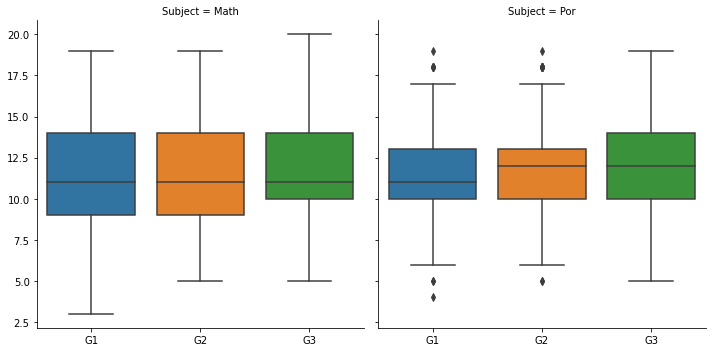

In [750]:
sns.catplot(data=clean_data[['Subject', 'G1', 'G2', 'G3']], kind='box', col='Subject')

- В среднем, диапазон итоговых оценок у португальского шире диапазона промежуточных, у математики наоборот
- Диапазон оценок по математике шире, чем по португальскому

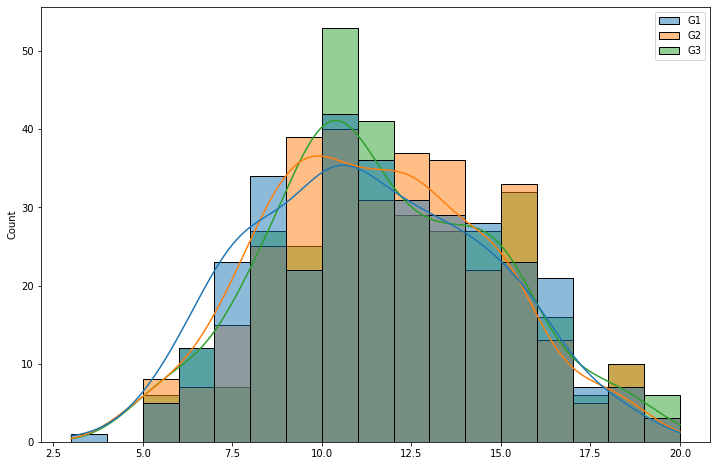

In [751]:
plt.figure(figsize=(12, 8))
sns.histplot(data=clean_data[clean_data['Subject'] == 'Math'][['G1', 'G2', 'G3']], kde=True, multiple='stack')

- Итоговые и промежуточные оценки очень сильно коррелируют между собой, как можно видеть на графике выше
- Разница чуть более заметна для оценок в диапазоне примерно от 5 до 8; здесь доминируют оценки за 1 семестр, т.е. в первый семестр в этом диапазоне их было больше, чем во втором семестр и в итоге
- Относительно предыдущего вывода, вторым по численности в этом диапазоне был 2 семестр, а меньше всего оценок в этом диапазоне в итоговых оценках

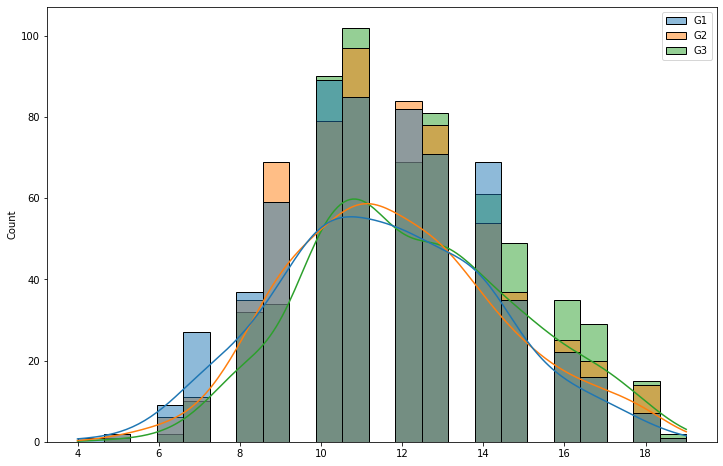

In [752]:
plt.figure(figsize=(12, 8))
sns.histplot(data=clean_data[clean_data['Subject'] == 'Por'][['G1', 'G2', 'G3']], kde=True, multiple='stack')

- Здесь статистика схожа с графиком распределения для математики, но основные расхождения оценок в промежуточных и итоговых оценках лежат в диапазоне от 5 до 10, что чуть больше, чем для португальского
- В диапазоне от 14 до 16 итоговый балл чуть выше, чем в промежуточном оценивании



- В общем, по графикам плотности распределения можно сказать, что в среднем наиболее высокими оказались итоговые оценки по математике и оценки по результатам второго полугодия по португальскому.



### Задание 6 
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

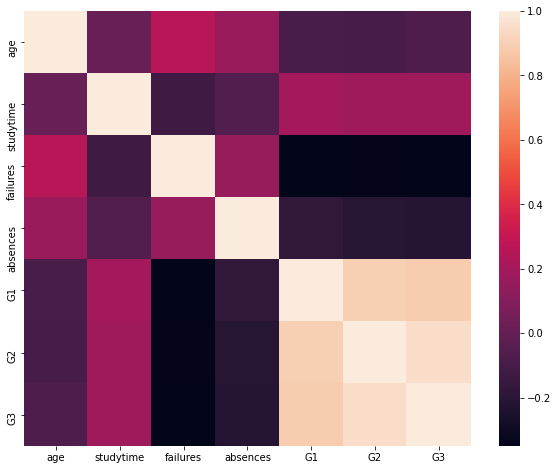

In [753]:
plt.figure(figsize=(10, 8))
sns.heatmap(clean_data.select_dtypes('int64').corr())

- Очевидно, что между признаками промежуточных и итоговых оценок высокая корреляция
- Удивительно, но достаточно сильно коррелирует возраст с количеством завалов. Возможно, люди с возрастом начинают более серьёзно подходить к делу, возможно и наоборот. 
- А может они просто учатся дольше и успели накопить больше долгов, это уже надо отдельно смотреть :)
- Негативная корреляция (обратная зависимость) существует и между оценками и количеством завалов, что достаточно логично

### Задание 7  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

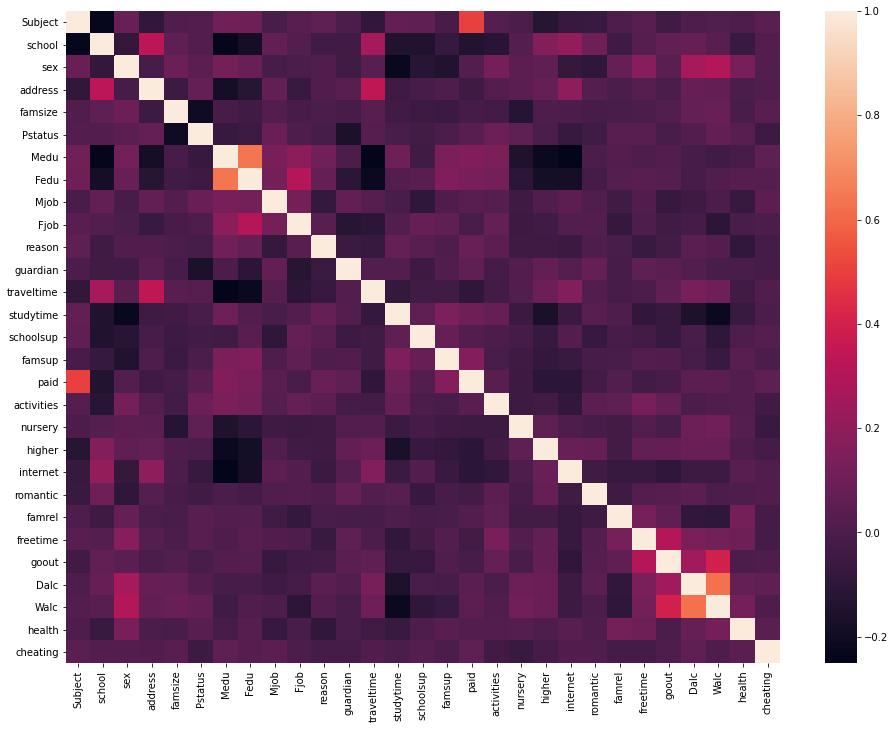

In [754]:
plt.figure(figsize=(16, 12))
catvars = enc_data.select_dtypes('category').astype(int)
sns.heatmap(catvars.corr())

- Сильно коррелируют предмет и наличие платных дополнительных занятий
- Также наблюдается сильная корреляция между местом проживания ученика и выбранной школой, ибо люди выбирают, где им удобнее учиться
- Время на дорогу зависит от школы и места проживания, что связано с прошлым пунктом
- Количество выпиваемого алкоголя и состояние здоровья связано с полом респондента!
- Количество времени, проведённого с друзьями, зависит от количества свободного времени после занятий
- Количество выпиваемого алкоголя зависит от количества времени, проведённого с друзьями
- Работа матери зависит от её образования
- Наблюдается отрицательная корреляция между образованием родителей и выбранной школой
- Отрицательная корреляция наблюдается и между выбранной школой и предметом
- Наличие интернета и планы получать высшее образование также подвержены отрицательной корреляции с образованием родителей

### Задание  8  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

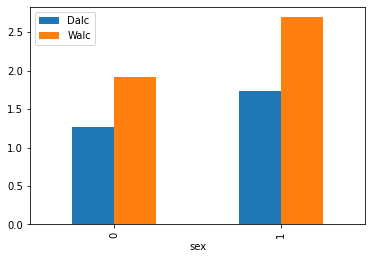

In [755]:
# Разница в употреблении алкоголя между парнями и девушками
catvars[['sex', 'Dalc', 'Walc']].groupby('sex').mean().plot(kind='bar')

- Здесь **0** -- **F**, а **1** -- **M**
- Тогда отсюда следует, что мужчины в среднем пьют значительно больше как в будние, так и в выходные дни

In [756]:
data_8 = enc_data[['address', 'Pstatus', 'higher', 'romantic', 'freetime']].astype(int)

In [757]:
alc_features = (data_8.corrwith(enc_data['Dalc']) + data_8.corrwith(enc_data['Walc'])).sort_values()

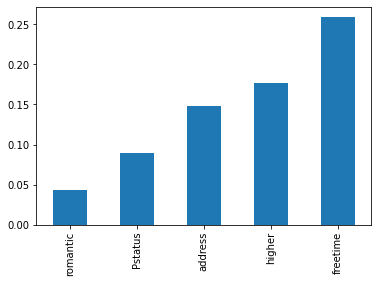

In [758]:
# Признаки, коррелирующие с употреблением алкоголя отсортированы в порядке значимости
# Самый коррелирующий признак -- количество свободного времени
# Наименее коррелирующий -- состояние в романтических отношениях
alc_features.plot(kind='bar')

Text(0.5, 1.0, 'Употребление алкоголя 50 худшими студентами')

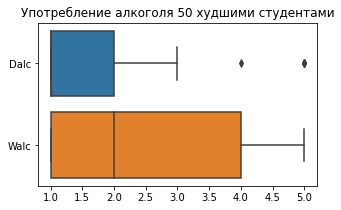

In [759]:
# Худшие студенты пьют достаточно много алкоголя
plt.figure(figsize=(5,3))
enc_data[['Dalc', 'Walc']] = enc_data[['Dalc', 'Walc']].astype(int)
worst_students = enc_data.nsmallest(50, 'G3')
sns.boxplot(data=worst_students[['Dalc','Walc']], orient='h').set_title('Употребление алкоголя 50 худшими студентами')

Text(0.5, 1.0, 'Употребление алкоголя 50 лучшими студентами')

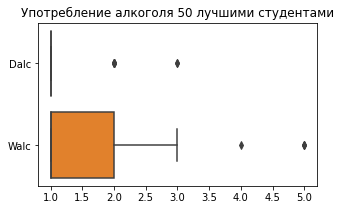

In [760]:
# Лучше студенты почти не пьют алкоголь
plt.figure(figsize=(5,3))
best_students = data.nlargest(50, 'G3')
sns.boxplot(data=best_students[['Dalc','Walc']], orient='h').set_title('Употребление алкоголя 50 лучшими студентами')

### Задание 9     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

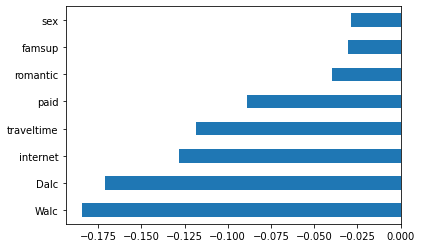

In [761]:
enc_data[['sex', 'traveltime', 'famsup', 'paid', 'internet', 'romantic']] = enc_data[
  ['sex', 'traveltime', 'famsup', 'paid', 'internet', 'romantic']
  ].astype(int)

corr_9 = enc_data[
                  ['sex', 'traveltime', 'famsup', 'paid', 'internet', 'romantic', 'Dalc', 'Walc']
                  ].corrwith(enc_data['G3']).sort_values()

corr_9.plot(kind='barh')

- Итоговая оценка находится в наименьшей обратной зависимости от пола и обратной зависимости от остальных признаков, из которых наиболее существенным является употребление алкоголя.

### Задание 10  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [762]:
def get_gpa(score):
  score = round(score)
  
  if 18 <= score <= 20:
    return 'Отлично'
  if 14 <= score <= 17:
    return 'Хорошо'
  if 8 <= score <= 13:
    return 'Удовлетворительно'
  if score < 8:
    return 'Неудовлетворительно'

In [763]:
clean_data['GPA'] = clean_data['G3'].apply(get_gpa)
enc_data['GPA'], _ = pd.factorize(clean_data['GPA'])

In [764]:
clean_data[clean_data['GPA'] == 'Удовлетворительно'].head()

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3,GPA
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4,4,5,3,5,5,0,yes,9,8,10,Удовлетворительно
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,4,5,2,yes,12,13,13,Удовлетворительно
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3,3,4,4,5,4,2,no,11,11,12,Удовлетворительно
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,no,11,12,9,Удовлетворительно
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3,4,5,1,2,5,4,no,9,10,11,Удовлетворительно


In [765]:
enc_data[enc_data['GPA'] == 1].head()

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3,GPA
2,102965,0,0,1,16,0,1,1,1,2,2,1,0,1,2,1,2,0,0,0,0,1,0,0,0,4,4,5,3,5,5,0,1,9,8,10,1
4,103131,0,0,0,16,0,0,1,1,1,3,0,1,1,2,1,0,0,1,0,0,0,0,1,0,4,3,2,1,4,5,2,1,12,13,13,1
5,103144,0,0,1,18,0,1,1,3,1,0,1,0,1,2,1,0,0,0,0,1,0,0,0,1,3,3,4,4,5,4,2,0,11,11,12,1
6,105257,0,1,0,18,0,0,1,1,1,1,0,0,1,2,2,0,0,0,0,1,0,0,1,0,1,1,1,1,1,5,6,0,11,12,9,1
9,108089,0,1,1,16,1,0,1,3,4,1,2,3,1,3,2,0,0,0,0,0,1,0,1,0,3,4,5,1,2,5,4,0,9,10,11,1


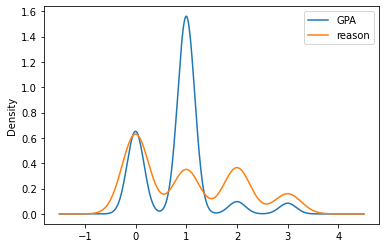

In [766]:
enc_data['reason'] = enc_data['reason'].astype(int)
enc_data[['GPA', 'reason']].plot.kde()

- Распределение этих двух признаков достаточно сильно совпадает в случаях, когда ученики имеют хорошую успеваемость и выбрали школу из-за читаемых курсов, а также в случае отличной успеваемости и иных причин выбора школы
- Но достаточно сильное различие в распределении наблюдается в случае с выбором школы из-за близости к дому и удовлетворительной успеваемостью

### Задание 12  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [767]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    enc_data.drop(['ID', 'G1', 'G2', 'G3'], axis=1), enc_data['GPA'])

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [768]:
print(classification_report(lr.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      0.95      0.97       162
           2       0.38      0.56      0.45         9
           3       0.60      1.00      0.75         6

    accuracy                           0.95       234
   macro avg       0.75      0.88      0.79       234
weighted avg       0.97      0.95      0.96       234



- Weighted F1-score составляет 96%, что достаточно неплохо, но было бы лучше попробовать бустинги типа xgboost или lightgbm, а не родимый логрег...
- У меня возникли совсем большие проблемы со 2 классом. Вероятно, IQR определил слишком много выбросов и мы удалили много важного, надо было использовать z-score.

### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [ ]:
# Многие интересные выводы относительно этого написаны сразу под заданиями ;) 
# Не разрывать же изложение